In [1]:
import pandas as pd
import numpy as np
my = pd.read_csv('maoyanfilms_clean.csv')

In [2]:
director_names = [] # 导演名单
actor_names = [] # 主演名单
for i in  my['films_director']:
    if type(i)==str:
        d_list = i.split(',')
        for j in d_list:
            s = j.replace('\n','')
            if s not in director_names:
                director_names.append(s)
for i in  my['films_actor']:
    if type(i)==str:
        d_list = i.split(',')
        for j in d_list:
            s = j.replace('\n','')
            if s not in actor_names:
                actor_names.append(s)

In [3]:
director_films_count = [0]*len(director_names) # 导演作品统计 有评分的
director_films_average_score = [0]*len(director_names)
for i in  my['films_director']:
    if type(i)==str:
        d_list = i.split(',')
        for j in d_list:
            s = j.replace('\n','')
            for k in range(0,len(director_names)):
                if s==director_names[k]:
                    s_list = my[my['films_director']==i]['films_score']
                    score = s_list.sum()
                    num = s_list.count()
                    director_films_count[k]=num
                    director_films_average_score[k]= round((score/num),2)
#-------------------------------------
# 先把平均分为 nan的处理掉，联动导演的名字一起删掉
a_df = pd.DataFrame(director_films_average_score)
a_df = a_df.dropna()
nan_index_list = []
for i in range(0,len(director_names)):  #索引倒序删除
    if i not in a_df.index:
        nan_index_list.append(i)
for j in nan_index_list[::-1]:
    del director_names[j]
    del director_films_average_score[j]
    del director_films_count[j]
#删除评分等于8分以下的
low_score_index_list = []
for k in range(0,len(director_films_average_score)):
    if director_films_average_score[k]< 8.5:
        low_score_index_list.append(k)
for n in low_score_index_list[::-1]:
    del director_names[n]
    del director_films_count[n]
    del director_films_average_score[n]
#构成数据框
director_high_score_df = pd.DataFrame({
    '总数':director_films_count,
    '平均分': director_films_average_score
},index = director_names)


D:\Users\80423\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


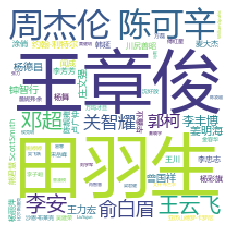

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

director_wordcloud = {}
for i in range(0,len(director_high_score_df)):
    director_wordcloud[director_high_score_df.index[i]]=director_high_score_df['总数'][i]

mask = np.array(Image.open('my1.png'))
size = Image.open('my1.png').size
dwc = WordCloud(font_path='/font/msyh.ttc',
                background_color='white',
                height=size[1],
                width=size[0],
                mask=mask).generate_from_frequencies(director_wordcloud)

fig = plt.figure(2)
plt.imshow(dwc)
plt.axis('off')
plt.show()

In [6]:
# 高分演员
actor_films_count = [0]*len(actor_names) # 导演作品统计 有评分的
actor_films_average_score = [0]*len(actor_names)
for i in  my['films_actor']:
    if type(i)==str:
        d_list = i.split(',')
        for j in d_list:
            s = j.replace('\n','')
            for k in range(0,len(actor_names)):
                if s==actor_names[k]:
                    s_list = my[my['films_actor']==i]['films_score']
                    score = s_list.sum()
                    num = s_list.count()
                    actor_films_count[k]=num
                    actor_films_average_score[k]= round((score/num),2)
#-------------------------------------
# 先把平均分为 nan的处理掉，联动导演的名字一起删掉
a_df = pd.DataFrame(actor_films_average_score)
a_df = a_df.dropna()
nan_index_list = []
for i in range(0,len(actor_names)):  #索引倒序删除
    if i not in a_df.index:
        nan_index_list.append(i)
for j in nan_index_list[::-1]:
    del actor_names[j]
    del actor_films_average_score[j]
    del actor_films_count[j]
#删除评分等于8分以下的
low_score_index_list = []
for k in range(0,len(actor_films_average_score)):
    if actor_films_average_score[k]< 8.5:
        low_score_index_list.append(k)
for n in low_score_index_list[::-1]:
    del actor_names[n]
    del actor_films_count[n]
    del actor_films_average_score[n]
#构成数据框
actor_high_score_df = pd.DataFrame({
    '总数':actor_films_count,
    '平均分': actor_films_average_score
},index = actor_names)


D:\Users\80423\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


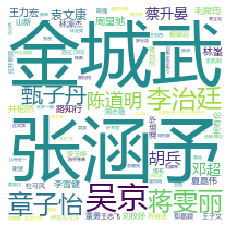

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

actor_wordcloud = {}
for i in range(0,len(actor_high_score_df)):
    actor_wordcloud[actor_high_score_df.index[i]]=actor_high_score_df['总数'][i]

mask = np.array(Image.open('my2.png'))
size = Image.open('my2.png').size
dwc = WordCloud(font_path='/font/msyh.ttc',
                background_color='white',
                height=size[1],
                width=size[0],
                mask=mask).generate_from_frequencies(actor_wordcloud)

fig = plt.figure(2)
plt.imshow(dwc)
plt.axis('off')
plt.show()